In [101]:
##imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mstats
import seaborn as sns

vuileboot = pd.read_excel(r'C:\Users\joost\Desktop\titanic3.xls')
##opschonen database, enkel rijen verwijderen waarbij 'age' en 'pclass' onbekend zijn.
boot= vuileboot.dropna( subset= ['age', 'pclass'], how='any')
## kijken welke columns deze dataset bevat en welke datatypes daarbij horen.
boot.columns
boot.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [25]:
## aantal overlevende, waarde 1 betekend dat ze de ramp overleeft hebben.
boot['survived'].value_counts()


0    809
1    500
Name: survived, dtype: int64

In [27]:
## berekening van overlevingskans
boot['survived'].value_counts(normalize=True) * 100


0    61.802903
1    38.197097
Name: survived, dtype: float64

In [36]:
aantal_geslacht = pd.crosstab(boot.sex, boot.survived)
percentage_geslacht = pd.crosstab(boot.sex, boot.survived, normalize="index")
spreiding_geslacht = pd.crosstab(boot.sex, boot.survived, normalize="all")
print(aantal_geslacht);
print();
print("Overlevingskans per geslacht")
print(percentage_geslacht);
print();
print("totale spreiding van overlevingskans");
print(spreiding_geslacht);

survived    0    1
sex               
female    127  339
male      682  161

Overlevingskans per geslacht
survived         0         1
sex                         
female    0.272532  0.727468
male      0.809015  0.190985

totale spreiding van overlevingskans
survived         0         1
sex                         
female    0.097021  0.258976
male      0.521008  0.122995


In [79]:
average = np.average(boot.age)
bereik = np.max(boot.age) - np.min(boot.age)
print("de gemiddelde leeftijd aan boord was: ", np.round(average))
print("de mediaan is: ", np.median(boot.age))
print("de modus:", stats.mode(boot.age))
print("het bereik is: ", bereik)


de gemiddelde leeftijd aan boord was:  30.0
de mediaan is:  28.0
de modus: ModeResult(mode=array([24.]), count=array([47]))
het bereik is:  79.8333


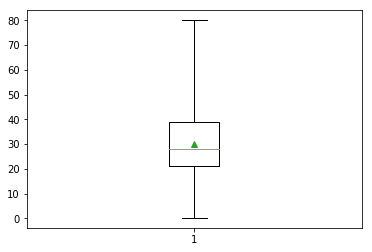

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64


0.25    21.0
0.50    28.0
0.75    39.0
1.00    80.0
Name: age, dtype: float64

In [97]:
##tekenen van boxplot van de leeftijd met een beschrijving van heel wat nuttig informatie
##zoals bijvoorbeeld het aantal records, gemiddelde, standaarddeviatie, min en max
##en de interkwartielafstand
plt.boxplot(boot.age,showmeans=True, whis= 99)
plt.show()
beschrijving = boot['age'].describe()
print(beschrijving)

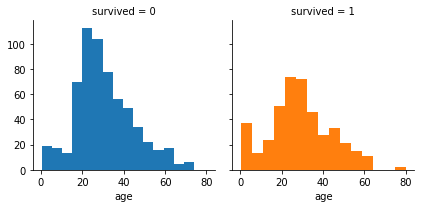

In [111]:
age_hist = sns.FacetGrid(boot, col="survived", hue="survived")
age_hist.map(plt.hist, 'age', bins=15)

In [129]:
relatie_leeftijd_overleefd = np.corrcoef(boot.age, boot.survived)
relatie_klasse_overleefd = np.corrcoef(boot.pclass, boot.survived)
## geen nuttige correlatiecoëfficient te vinden
print(relatie_leeftijd_overleefd)
print(relatie_klasse_overleefd)

## Er is dus een possitieve correlatie tussen het aantal dichte familieleden(broer,zus,ouders)
## en het aantal verdere familieleden(neven,nichten,nonkels,tantes)
cov_sibsp_parch = np.cov(boot.sibsp, boot.parch)
print()
print('correlatie tussen familieleden aan boord')
print(cov_leeftijd_overleefd)

[[ 1.         -0.05551252]
 [-0.05551252  1.        ]]
[[ 1.         -0.32048636]
 [-0.32048636  1.        ]]

correlatie tussen familieleden aan boord
[[0.83204918 0.28683067]
 [0.28683067 0.70518082]]
